In [1]:
# 1. Impor pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Atur gaya visualisasi agar terlihat menarik
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# 3. Muat dataset Anda
df = pd.read_csv('dataset_komik_bersih.csv', encoding='latin-1')

In [ ]:
# 4. Tampilkan 5 baris pertama untuk memastikan data termuat dengan benar
display(df.head())

,title,description,rating,year,genre_tag
0,Salad Days (Tang LiuZang) - Part 2 ...,the second season ofsalad days tang liuzang ...,4.7,2021,BL
1,Salad Days (Tang LiuZang) - Part 2 ...,the second season ofsalad days tang liuzang ...,4.7,2021,Manhua
2,Salad Days (Tang LiuZang) - Part 2 ...,the second season ofsalad days tang liuzang ...,4.7,2021,Romance
3,Salad Days (Tang LiuZang) - Part 2 ...,the second season ofsalad days tang liuzang ...,4.7,2021,Shounen-ai
4,Salad Days (Tang LiuZang) - Part 2 ...,the second season ofsalad days tang liuzang ...,4.7,2021,Sports


In [3]:
# 5. Tampilkan informasi dasar dataset (tipe data, non-null)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203758 entries, 0 to 203757
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   title        203758 non-null  object 
 1   description  203758 non-null  object 
 2   rating       203758 non-null  float64
 3   year         203758 non-null  int64  
 4   genre_tag    203758 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.8+ MB


c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


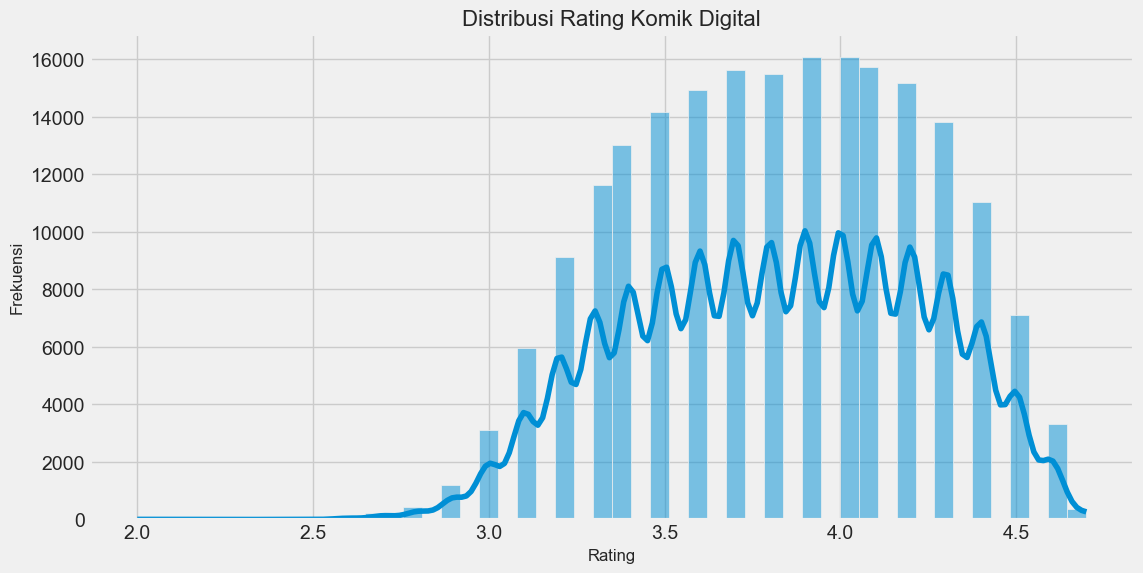

In [4]:
# 6. Membuat visualisasi distribusi rating
plt.figure(figsize=(12, 6))
sns.histplot(df['rating'], kde=True, bins=50)
plt.title('Distribusi Rating Komik Digital', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

Tabel 1: Top 15 Genre Paling Umum


,count
genre_tag,
Romance,14706
Drama,10656
Comedy,9780
BL,7635
School Life,6999
Fantasy,6992
Full Color,6318
Yaoi,6085
Webtoons,5858


c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


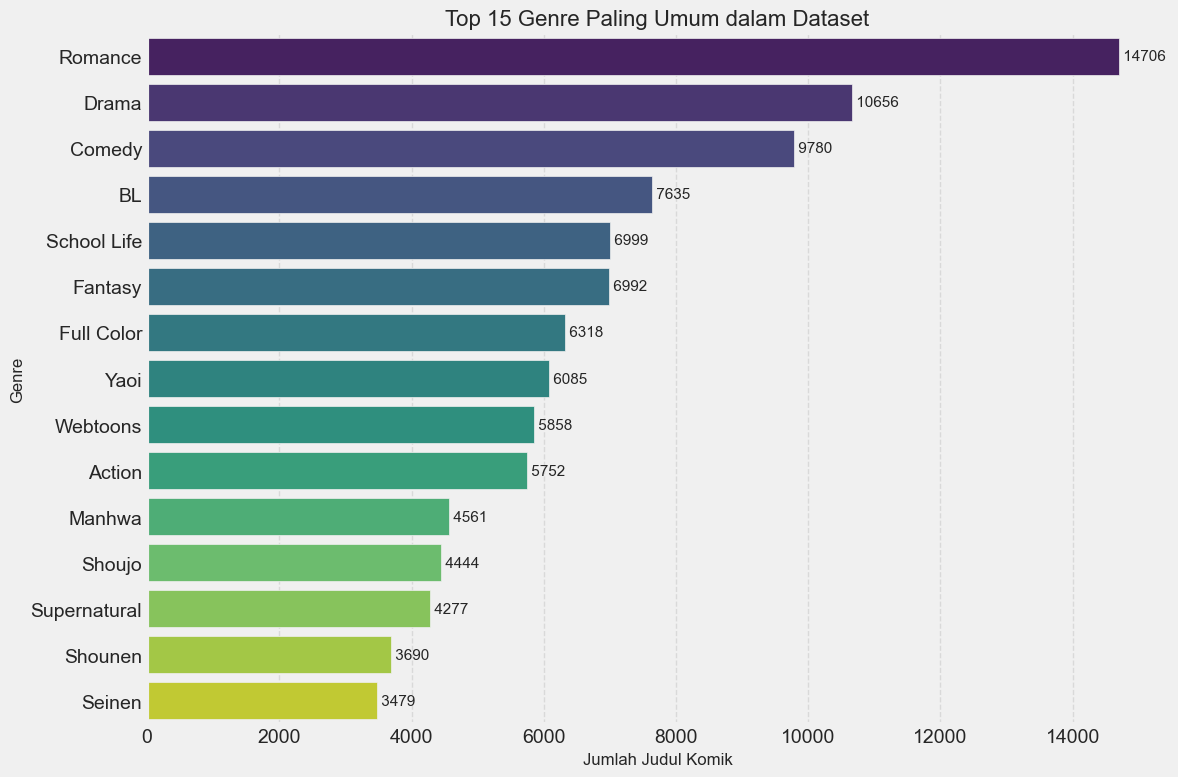

In [5]:
# 7. Menganalisis Frekuensi Genre
# Hitung 15 genre yang paling sering muncul
top_genres = df['genre_tag'].value_counts().nlargest(15)

# Tampilkan dalam bentuk tabel
print("Tabel 1: Top 15 Genre Paling Umum")
display(top_genres.to_frame())

# 8. Visualisasi Frekuensi Genre dengan Nilai
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 15 Genre Paling Umum dalam Dataset', fontsize=16)
plt.xlabel('Jumlah Judul Komik', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
for index, value in enumerate(top_genres.values):
    plt.text(value, index, f' {value}', va='center', fontsize=11)
plt.tight_layout()


Tabel 2: Rata-rata Rating per Genre (Top 15 Genre Umum)


,rating
genre_tag,
Manhwa,3.931068
Webtoons,3.918539
Full Color,3.897911
Fantasy,3.890503
Action,3.872340
Comedy,3.808814
Shounen,3.805257
Supernatural,3.797709
Drama,3.797523


c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


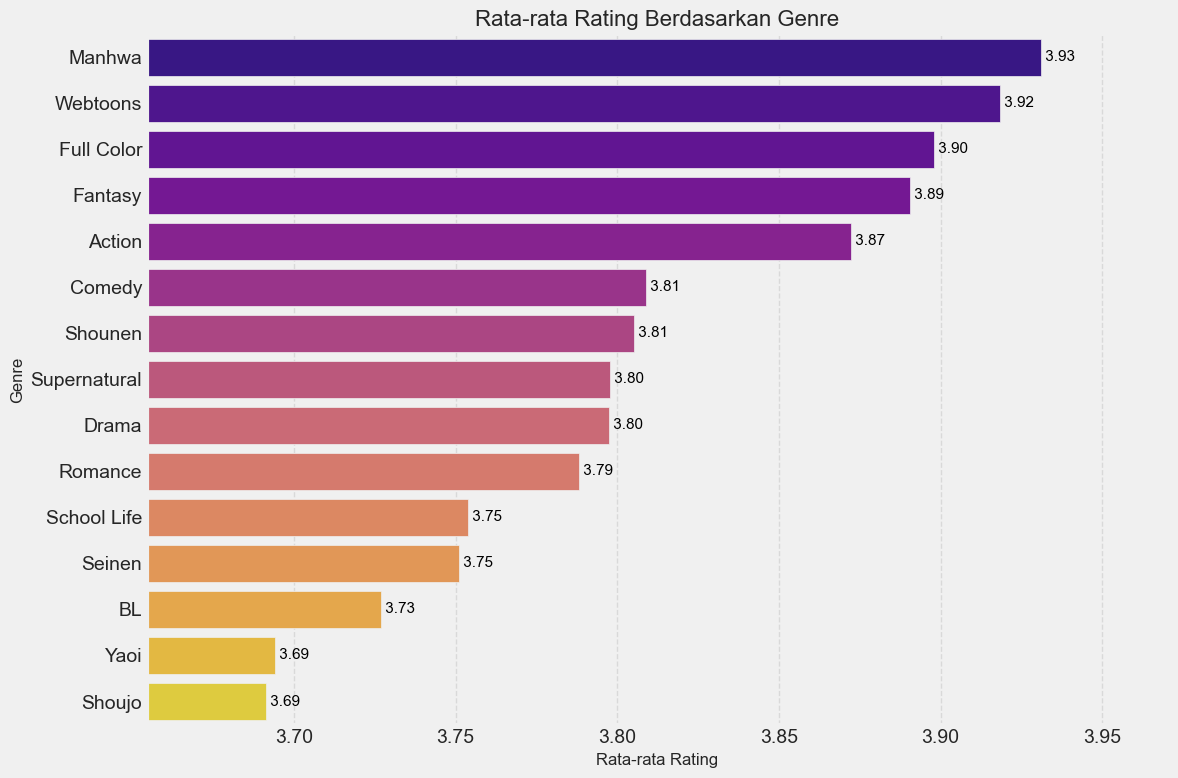

In [6]:
# 9. Menganalisis Rata-rata Rating per Genre
df_top_genres = df[df['genre_tag'].isin(top_genres.index)]
avg_rating_by_genre = df_top_genres.groupby('genre_tag')['rating'].mean().sort_values(ascending=False)

# Tampilkan tabel
print("\nTabel 2: Rata-rata Rating per Genre (Top 15 Genre Umum)")
display(avg_rating_by_genre.to_frame())

# 10. Visualisasi Rata-rata Rating per Genre
plt.figure(figsize=(12, 8))
plot = sns.barplot(x=avg_rating_by_genre.values, y=avg_rating_by_genre.index, palette='plasma')
plt.title('Rata-rata Rating Berdasarkan Genre', fontsize=16)
plt.xlabel('Rata-rata Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Hitung batas minimum dan maksimum dari data Anda
min_rating = avg_rating_by_genre.min()
max_rating = avg_rating_by_genre.max()

# Atur batas sumbu-x secara dinamis dengan sedikit spasi tambahan
plt.xlim(min_rating * 0.99, max_rating * 1.01)

# Menambahkan nilai di setiap baris
for index, value in enumerate(avg_rating_by_genre):
    plt.text(value, index, f' {value:.2f}', va='center', fontsize=11, color='black')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

In [7]:
# 1. Impor pustaka untuk TF-IDF dan LDA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 2. Tambahkan daftar kata-kata umum yang ingin kita abaikan
# Berdasarkan hasil percobaan sebelumnya, kita masukkan kata-kata yang terlalu sering muncul
custom_stop_words = ['life', 'world', 'school', 'love', 'day', 'girl', 'man', 
                     'hes', 'shes', 'entry', 'synopsis', 'check', 'currently', 
                     'soon', 'doesnt', 'just', 'like', 'time', 'years', 'new']

# Gabungkan dengan stop words standar dari Scikit-learn
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)

# 3. Inisialisasi TF-IDF Vectorizer dengan parameter baru
# Kita turunkan max_df menjadi 0.6 (abaikan kata yang muncul di >60% dokumen)
# Kita juga gunakan daftar stop_words kustom kita
tfidf_vectorizer = TfidfVectorizer(max_df=0.6, min_df=3, stop_words=list(stop_words))

# 4. Ubah kolom 'description' menjadi matriks TF-IDF
df['description'] = df['description'].fillna('')
dtm = tfidf_vectorizer.fit_transform(df['description'])

print("Matriks TF-IDF (versi 2) berhasil dibuat.")
print("Bentuk matriks:", dtm.shape)

# 5. Inisialisasi dan latih kembali model LDA
# Mari kita coba dengan jumlah topik yang sedikit lebih sedikit, misal 12
n_topics = 12
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(dtm)

print(f"\nModel LDA dengan {n_topics} topik berhasil dilatih kembali.")

Matriks TF-IDF (versi 2) berhasil dibuat.
Bentuk matriks: (203758, 63201)

Model LDA dengan 12 topik berhasil dilatih kembali.


In [8]:
# 6. Fungsi untuk menampilkan topik (tetap sama)
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict[f"Topik {topic_idx}"] = topic_words
    return topic_dict

# 7. Dapatkan daftar kata baru
feature_names = tfidf_vectorizer.get_feature_names_out()

# 8. Tampilkan 10 kata teratas untuk setiap topik baru
no_top_words = 10
topics = display_topics(lda, feature_names, no_top_words)

# Tampilkan hasil baru
print(f"\nMenampilkan Top 10 Kata untuk Setiap Topik (Hasil Baru):")
for topic, words in topics.items():
    print(f"{topic}: {' | '.join(words)}")


Menampilkan Top 10 Kata untuk Setiap Topik (Hasil Baru):
Topik 0: young | boy | student | way | story | people | high | little | family | make
Topik 1: high | young | friend | story | boy | family | friends | people | make | girls
Topik 2: high | student | friend | boy | friends | young | people | girls | story | gets
Topik 3: student | high | boy | young | friends | finds | friend | brother | relationship | story
Topik 4: student | young | club | boy | make | high | game | family | prince | finds
Topik 5: chapters | includes | following | special | young | finds | work | family | sister | high
Topik 6: season | second | high | friend | family | boy | story | young | student | childhood
Topik 7: included | high | story | boy | family | student | friend | finds | friends | secret
Topik 8: story | demon | young | people | body | death | high | finds | boy | game
Topik 9: game | young | magic | im | king | demon | story | high | way | boy
Topik 10: story | student | boy | high | way | se

In [ ]:
# 1. Gunakan model LDA untuk men-transformasi matriks DTM
# Hasilnya adalah sebuah array di mana setiap baris adalah sebuah komik,
# dan setiap kolom adalah probabilitas topik untuk komik tersebut.
topic_distribution = lda.transform(dtm)

# Tampilkan bentuk array untuk verifikasi
print("Bentuk matriks distribusi topik:", topic_distribution.shape)

Bentuk matriks distribusi topik: (203758, 12)


In [ ]:
# 2. Buat nama kolom yang deskriptif untuk setiap topik
topic_columns = [f'Topik_{i}' for i in range(n_topics)] # n_topics dari kode sebelumnya (12)

# 3. Buat DataFrame baru dari hasil distribusi topik
topic_features_df = pd.DataFrame(data=topic_distribution, columns=topic_columns)

# 4. Tampilkan 5 baris random dari DataFrame fitur topik yang baru
print("\nDataFrame Fitur Topik (5 baris pertama):")
display(topic_features_df.sample(5))


DataFrame Fitur Topik (5 baris pertama):


,Topik_0,Topik_1,Topik_2,Topik_3,Topik_4,Topik_5,Topik_6,Topik_7,Topik_8,Topik_9,Topik_10,Topik_11
194823,0.012350,0.012349,0.012350,0.864156,0.012350,0.012349,0.012349,0.012349,0.012349,0.012349,0.012350,0.012349
34932,0.012085,0.012085,0.012085,0.797379,0.012085,0.012085,0.012085,0.081772,0.012085,0.012085,0.012085,0.012085
83308,0.014288,0.014288,0.014287,0.842837,0.014287,0.014288,0.014288,0.014287,0.014288,0.014288,0.014288,0.014288
55726,0.858215,0.012889,0.012890,0.012889,0.012890,0.012890,0.012889,0.012890,0.012890,0.012890,0.012890,0.012890
75966,0.012571,0.861715,0.012572,0.012571,0.012571,0.012571,0.012571,0.012571,0.012571,0.012571,0.012571,0.012571


In [ ]:
# 5. Gabungkan DataFrame asli (df) dengan DataFrame fitur topik (topic_features_df)
# Kita simpan hasilnya dalam DataFrame baru bernama df_final
# df.reset_index(drop=True) dan topic_features_df.reset_index(drop=True) digunakan untuk memastikan
# tidak ada masalah penggabungan jika ada inkonsistensi indeks.
df_final = pd.concat([df.reset_index(drop=True), topic_features_df.reset_index(drop=True)], axis=1)

# 6. Tampilkan 5 baris random dari dataset final yang sudah lengkap dengan fitur topik
print("\nDataset Final Lengkap dengan Fitur Topik (5 baris pertama):")
display(df_final.sample(5))

# 7. Tampilkan kolom-kolom dari dataset final untuk verifikasi
print("\nKolom pada dataset final:")
print(df_final.columns)


Dataset Final Lengkap dengan Fitur Topik (5 baris pertama):


,title,description,rating,year,genre_tag,Topik_0,Topik_1,Topik_2,Topik_3,Topik_4,Topik_5,Topik_6,Topik_7,Topik_8,Topik_9,Topik_10,Topik_11
125158,Zettai Hakase Kolisch ...,it is said that deep in the city there is a my...,3.7,2008,Shounen,0.015392,0.830697,0.015391,0.015391,0.015391,0.015391,0.015391,0.015391,0.015391,0.015391,0.015391,0.015391
131953,Kimi to Shitai to Boku no Kaitou ...,after souls die corpses still keep their heart...,3.6,2012,Action,0.821287,0.016247,0.016247,0.016246,0.016246,0.016247,0.016246,0.016247,0.016247,0.016246,0.016247,0.016247
110413,Candy Flower ...,kobayakawa loves to tend the garden club plot ...,3.8,2004,Romance,0.014420,0.014421,0.014420,0.014421,0.014423,0.014421,0.014420,0.014420,0.841372,0.014421,0.014420,0.014421
175523,A Marriage for Sale ...,being forced to get married she is really conf...,3.3,2019,Webtoons,0.014365,0.841984,0.014365,0.014365,0.014365,0.014365,0.014365,0.014365,0.014365,0.014365,0.014365,0.014365
113364,Abyss Rage ...,a blind boy shinobu lives a peaceful life with...,3.8,2018,Shounen,0.011430,0.011430,0.011430,0.011430,0.011430,0.011430,0.011430,0.011430,0.874272,0.011430,0.011430,0.011430



Kolom pada dataset final:
Index(['title', 'description', 'rating', 'year', 'genre_tag', 'Topik_0',
       'Topik_1', 'Topik_2', 'Topik_3', 'Topik_4', 'Topik_5', 'Topik_6',
       'Topik_7', 'Topik_8', 'Topik_9', 'Topik_10', 'Topik_11'],
      dtype='object')


In [18]:
# 1. Impor pustaka yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 2. Hapus kolom yang tidak akan digunakan sebagai fitur
# 'title' dan 'description' adalah teks, 'genre_tag' akan kita proses terpisah
# 'rating' adalah target kita
features_to_drop = ['title', 'description', 'rating', 'genre_tag']
X_numerical_and_topics = df_final.drop(columns=features_to_drop)

# 3. Ubah fitur kategorikal 'genre_tag' menjadi format numerik
# Kita gunakan One-Hot Encoding dengan pd.get_dummies()
genre_dummies = pd.get_dummies(df_final['genre_tag'], prefix='Genre')

# 4. Gabungkan semua fitur menjadi satu DataFrame (X)
X = pd.concat([X_numerical_and_topics, genre_dummies], axis=1)

# 5. Tentukan variabel target (y)
y = df_final['rating']

# Tampilkan beberapa baris pertama dari matriks fitur X
print("Matriks Fitur (X) sudah siap. 5 baris random:")
display(X.sample(5))

# Tampilkan dimensi dari X dan y untuk verifikasi
print(f"\nBentuk matriks fitur X: {X.shape}")
print(f"Bentuk variabel target y: {y.shape}")

Matriks Fitur (X) sudah siap. 5 baris random:


,year,Topik_0,Topik_1,Topik_2,Topik_3,Topik_4,Topik_5,Topik_6,Topik_7,Topik_8,...,Genre_Writers,Genre_Wuxia,Genre_Xianxia,Genre_Yakuza,Genre_Yaoi,Genre_Yaoi Hand Syndrome,Genre_Youkai,Genre_Yuri,Genre_Zombies,Genre_Zoo
189353,2007,0.015796,0.015796,0.015796,0.015796,0.015796,0.015796,0.826242,0.015796,0.015796,...,False,False,False,False,False,False,False,False,False,False
114228,2020,0.012679,0.012679,0.012679,0.012679,0.012679,0.012679,0.012679,0.012679,0.860531,...,False,False,False,False,False,False,False,False,False,False
137282,1999,0.011201,0.011201,0.011201,0.011201,0.011201,0.011201,0.011201,0.876791,0.011201,...,False,False,False,False,False,False,False,False,False,False
71295,2002,0.012915,0.012915,0.012915,0.857933,0.012915,0.012915,0.012915,0.012915,0.012915,...,False,False,False,False,False,False,False,False,False,False
96874,2020,0.014176,0.014175,0.014175,0.014176,0.844071,0.014175,0.014175,0.014175,0.014175,...,False,False,False,False,False,False,False,False,False,False



Bentuk matriks fitur X: (203758, 583)
Bentuk variabel target y: (203758,)


In [ ]:
# 6. Bagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Inisialisasi model RandomForestRegressor
# n_estimators=100: jumlah 'pohon' dalam 'hutan'
# random_state=42: agar hasil bisa direproduksi
# n_jobs=-1: menggunakan semua core CPU agar proses lebih cepat
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 8. Latih model menggunakan data training
print("Memulai pelatihan model Random Forest...")
model.fit(X_train, y_train)
print("Pelatihan model selesai!")

# Evaluasi sederhana model pada data test
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"\nMean Squared Error (MSE) pada data test: {mse:.4f}")

Memulai pelatihan model Random Forest...
Pelatihan model selesai!

Mean Squared Error (MSE) pada data test: 0.0154



Tabel 3: Top 20 Fitur Paling Penting


,Fitur,Tingkat Kepentingan
0,year,0.178626
5,Topik_4,0.076927
3,Topik_2,0.063363
11,Topik_10,0.063271
10,Topik_9,0.063145
8,Topik_7,0.062900
4,Topik_3,0.062240
7,Topik_6,0.061148
6,Topik_5,0.059889
9,Topik_8,0.059460


c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Evan\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


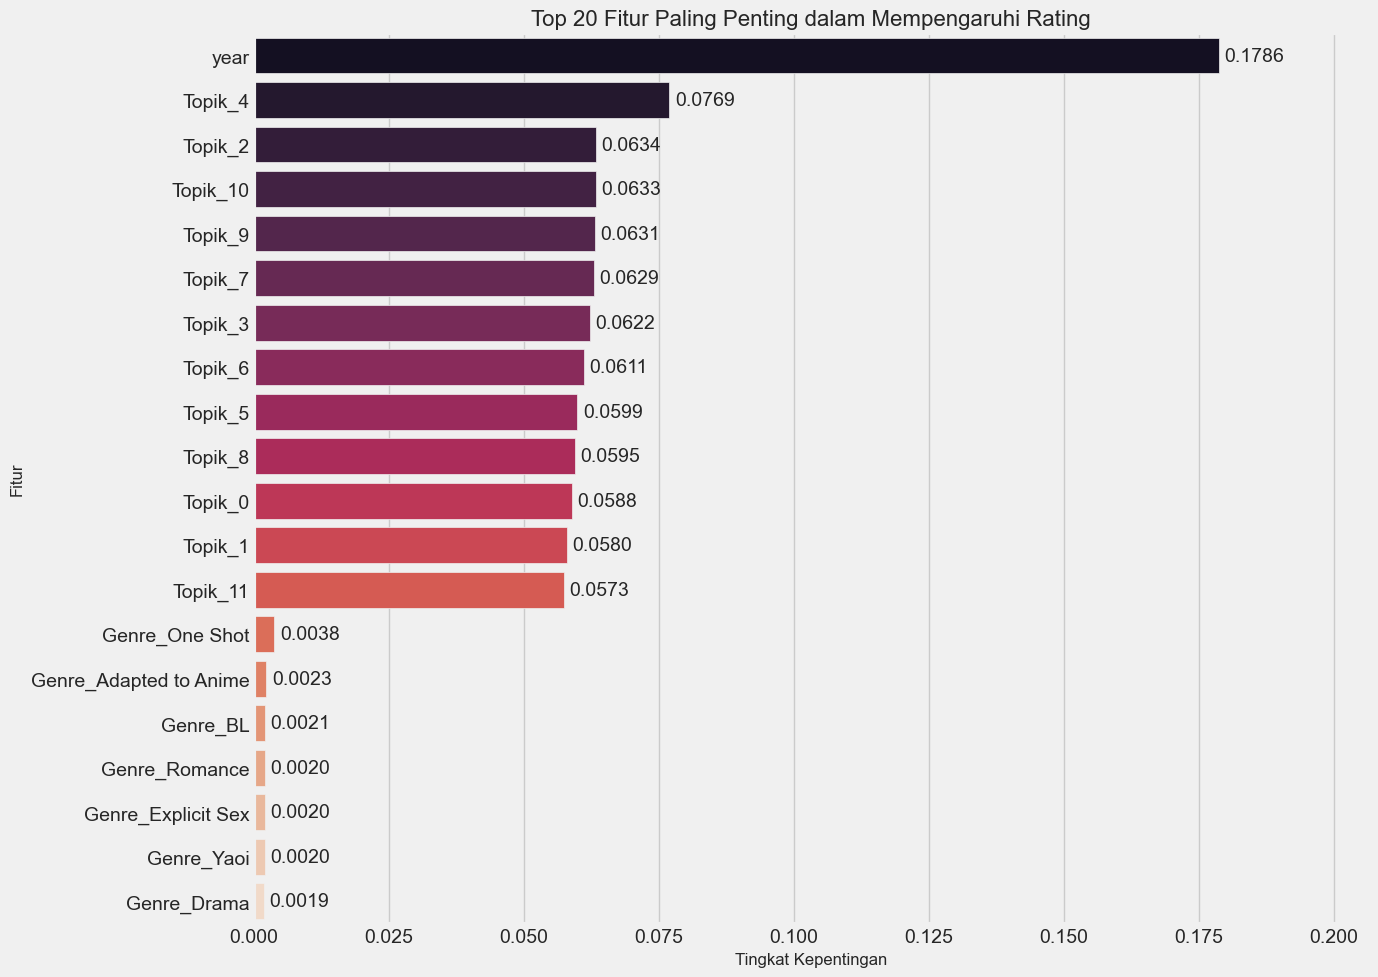

In [22]:
# 9. Dapatkan daftar tingkat kepentingan fitur dari model
importances = model.feature_importances_

# 10. Buat DataFrame untuk menampilkan hasilnya dengan rapi
feature_importance_df = pd.DataFrame({
    'Fitur': X.columns,
    'Tingkat Kepentingan': importances
}).sort_values(by='Tingkat Kepentingan', ascending=False)

# 11. Tampilkan 20 fitur paling penting
print("\nTabel 3: Top 20 Fitur Paling Penting")
display(feature_importance_df.head(20))

# 12. Visualisasikan 20 fitur paling penting DENGAN LABEL NILAI
plt.figure(figsize=(14, 10))

# Buat bar plot dan simpan axis-nya ke dalam variabel 'ax'
ax = sns.barplot(x='Tingkat Kepentingan', y='Fitur', data=feature_importance_df.head(20), palette='rocket')

# Beri judul dan label
ax.set_title('Top 20 Fitur Paling Penting dalam Mempengaruhi Rating', fontsize=16)
ax.set_xlabel('Tingkat Kepentingan', fontsize=12)
ax.set_ylabel('Fitur', fontsize=12)

# Loop melalui setiap bar (patch) di plot
for p in ax.patches:
    # Dapatkan lebar bar (ini adalah nilai tingkat kepentingannya)
    width = p.get_width()
    # Tuliskan teksnya
    ax.text(width + 0.001,  # Posisi x (sedikit di kanan bar)
            p.get_y() + p.get_height() / 2, # Posisi y (di tengah bar secara vertikal)
            f'{width:.4f}', # Teks yang akan ditulis (format 4 angka desimal)
            va='center') # Jajarkan teks secara vertikal di tengah

# Sesuaikan batas plot agar label tidak terpotong
plt.xlim(0, ax.get_xlim()[1] * 1.1)
plt.tight_layout()